In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sephora_reviews_0420.csv')
df

/var/folders/bm/2_7kzyhj1nd2kzn6myjfln740000gn/T/ipykernel_52322/4214161504.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sephora_reviews_0420.csv')


,author_id,rating,is_recommended,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd,...,reviews,ingredients,highlights,primary_category,secondary_category,tertiary_category,year,month,day,season
0,1741593524,5.0,1.0,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,...,1,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",['Clean at Sephora'],Skincare,Cleansers,NaN,2023,2,1,Winter
1,5061282401,5.0,1.0,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,...,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,21,Spring
2,6083038851,5.0,1.0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,...,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,20,Spring
3,47056667835,5.0,1.0,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,...,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,20,Spring
4,42802569154,4.0,1.0,The scent isn’t my favourite but it works grea...,Great!,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,...,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,19,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749475,2276253200,5.0,1.0,Consider salicylic acid your secret weapon for...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13,Spring
749476,28013163278,5.0,1.0,I’ve been using this as my only moisturizer fo...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13,Spring
749477,1539813076,5.0,1.0,I got breakouts whenever it’s my time of month...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13,Spring
749478,5595682861,5.0,1.0,I love this!!! I don’t get actual acne just an...,No Title,oily,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,...,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13,Spring


In [3]:
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [4]:
df['season'] = df['month'].apply(map_month_to_season)

In [5]:
# df['year'] = df['year'].astype(int)
# df['month'] = df['month'].astype(int)
# df['day'] = df['day'].astype(int)

In [6]:
grouped = df.groupby(['secondary_category', 'year']).size().unstack(fill_value=0)
grouped_sorted = grouped.apply(lambda x: x.sort_values(ascending=False), axis=0)

In [7]:
# Plot stacked bar chart
# grouped_sorted.plot(kind='bar', stacked=True)
# plt.title('Stacked Bar Chart of Secondary Categories Over Years')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.legend(title='Secondary Category')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [8]:
grouped_products = grouped_sorted[[2017, 2018, 2019, 2020, 2021, 2022]]

In [9]:
product_groups = grouped_products.sort_values(by=2022, ascending=False)

In [10]:
product_groups.drop(['Shop by Concern'], axis = 0, inplace = True)

In [11]:
product_groups_t = product_groups.T

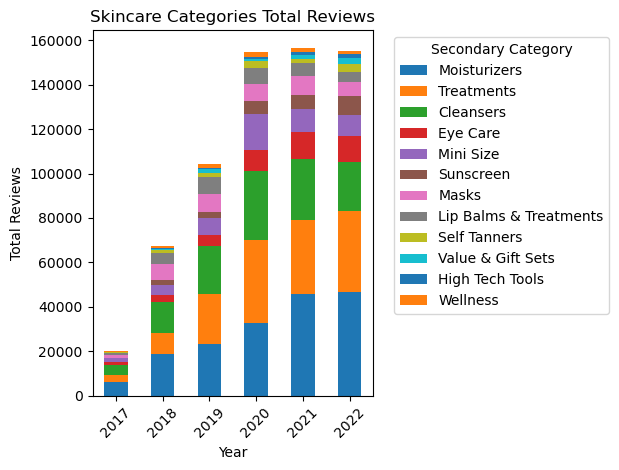

In [12]:
product_groups_t.plot(kind='bar', stacked=True)
plt.title('Skincare Categories Total Reviews')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.legend(title='Secondary Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
growth_rate = product_groups.T.pct_change()* 100

In [14]:
growth_rate

secondary_category,Moisturizers,Treatments,Cleansers,Eye Care,Mini Size,Sunscreen,Masks,Lip Balms & Treatments,Self Tanners,Value & Gift Sets,High Tech Tools,Wellness
year,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,193.151763,236.344969,211.286269,115.016835,182.556027,593.959732,523.353819,352.685422,758.196721,192.465753,440.000000,301.904762
2019,25.605499,128.561254,57.820183,55.809583,61.972133,28.336557,16.112676,47.532957,68.003820,264.402810,-8.230453,114.336493
2020,39.561332,66.335752,45.272753,88.120603,114.425622,115.599096,-4.257642,-10.799081,72.143263,-27.699229,87.219731,31.398563
2021,40.392746,-10.568997,-12.119854,26.979378,-35.686952,9.419783,8.539212,-18.431597,-37.582563,76.355556,76.766467,-27.261254
2022,1.501298,9.100703,-19.208072,0.395490,-9.318618,30.442421,-25.714953,-18.000000,80.846561,42.893145,21.883469,-10.063621


In [15]:
growth_rate.drop([2017], axis=0, inplace=True)

In [16]:
growth_rate.to_csv('secondary_growth_rate_2018_2022.csv')

<Axes: xlabel='year'>

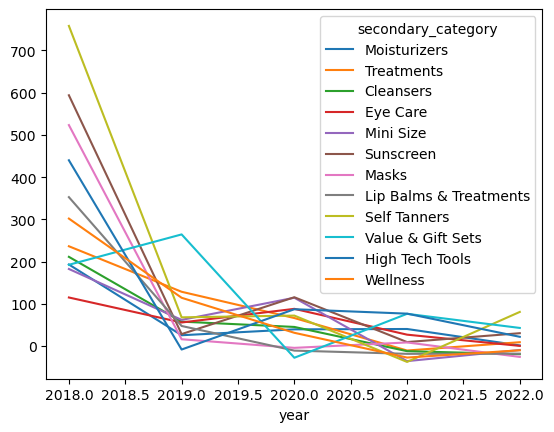

In [17]:
growth_rate.plot()

In [18]:
df.skin_type.unique()

array(['dry', 'combination', 'normal', 'oily'], dtype=object)

In [19]:
# Convert 'month' column to datetime type
df['month'] = pd.to_datetime(df['month'], format='%m')

# Define seasons
seasons = {
    'winter': [12, 1, 2],  # December, January, February
    'spring': [3, 4, 5],    # March, April, May
    'summer': [6, 7, 8],    # June, July, August
    'fall': [9, 10, 11]     # September, October, November
}

In [20]:
# Initialize dictionary to store the top 5 products per category for each season
top_products_by_category_season = {}

# Iterate over seasons
for season, months in seasons.items():
    # Filter data for the current season
    season_reviews = df[df['month'].dt.month.isin(months)]
    
    # Group by secondary category and product_id, then count the number of reviews for each combination
    popularity_by_category_product = season_reviews.groupby(['secondary_category', 'product_id']).size().reset_index(name='count')
    
    # Sort products within each category based on the count of reviews
    sorted_products = popularity_by_category_product.groupby('secondary_category').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
    
    # Store the top 5 products per category within the current season
    top_products_by_category_season[season] = sorted_products[['secondary_category', 'product_id']]

# Print the top 5 products per category for each season
print("Top 5 products per category for each season:")
for season, products in top_products_by_category_season.items():
    print(f"\n{season.capitalize()}:\n")
    for category, product_ids in products.groupby('secondary_category'):
        product_names = df[df['product_id'].isin(product_ids['product_id'])]['product_name'].unique()
        print(f"{category}:")
        for product_name in product_names:
            print(f"  - {product_name}")

Top 5 products per category for each season:

Winter:

Cleansers:
  - Soy Hydrating Gentle Face Cleanser
  - Green Clean Makeup Removing Cleansing Balm
  - Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo
  - Superfood Antioxidant Cleanser
  - Glow2OH Dark Spot Toner
Eye Care:
  - Moisturizing Eye Bomb with Squalane
  - Brighten-i Eye Cream
  - Shaba Complex Firming Eye Serum
  - Lotus Youth Preserve Eye Cream
  - Wake Up Honey Eye Cream with Brightening Vitamin C
High Tech Tools:
  - Pearly Girl Vegan Teeth Whitening Pen
  - DERMAPORE Ultrasonic Pore Extractor & Serum Infuser
  - Vegan Makeup Remover and Cleansing Brush
  - BEAR Facial Toning Device
  - NuFACE Mini+ Petite Facial Toning Device
Lip Balms & Treatments:
  - Lip Sleeping Mask Intense Hydration with Vitamin C
  - Rosebud Salve
  - Lip Glowy Balm
  - Sugar Advanced Lip Balm Intense Hydration Treatment
  - Glow Lip Pop Lip Balm
Masks:
  - Jet Lag Mask
  - Mini Jet Lag Mask
  - Floral Recovery Overnight Mask w

Cleansers:
  - Soy Hydrating Gentle Face Cleanser
  - Green Clean Makeup Removing Cleansing Balm
  - Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo
  - Superfood Antioxidant Cleanser
  - Take The Day Off Cleansing Balm Makeup Remover
Eye Care:
  - Moisturizing Eye Bomb with Squalane
  - Advanced Génifique Yeux Light-Pearl Eye Serum
  - Ginzing Vitamin C Eye Cream to Brighten and Depuff
  - Guava Vitamin C Bright-Eye Gel Cream
  - Cryo-Recovery Depuffing Eye Serum
High Tech Tools:
  - Pearly Girl Vegan Teeth Whitening Pen
  - Gua Sha Facial Lifting Tool
  - LUNA fofo
  - Metal Facial Razor
  - Facial Sculpting Wand
Lip Balms & Treatments:
  - Lip Sleeping Mask Intense Hydration with Vitamin C
  - Rosebud Salve
  - Lip Glowy Balm
  - Intense Therapy Lip Balm SPF 25
  - Strawberry Lip Balm
Masks:
  - Clear Improvement Active Charcoal Mask to Clear Pores
  - Jet Lag Mask
  - Mini Jet Lag Mask
  - T.L.C. Sukari Babyfacial AHA + BHA Mask
  - Greek Yoghurt Probiotic Superdos